<a href="https://colab.research.google.com/github/maxwmsilva/desafio-ninjaStartupJob/blob/main/ninja_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Conectando ao Google BigQuery com Python: https://hex.tech/blog/connecting-bigquery-python/

- Você precisará criar uma conta no Google Cloud.

  Lhe pedirão um cartão de crédito pela avaliação, porém nada será cobrado.

In [1]:
!pip install google-auth google-cloud-bigquery  pandas_gbq

- Você precisará criar uma conta de serviço para realizar as consultas com Python.

  https://cloud.google.com/iam/docs/service-accounts-create?hl=pt-br#creating

  Após criá-la, crie uma chave, baixe-a e carregue-a neste COLAB.

  Você também precisará adicionar a seguinte permissão à conta de serviço, na aba "Gerenciar Recursos":
  - Usuário de Jobs do BigQuery


In [4]:
import pandas as pd
from google.cloud import bigquery
from google.oauth2 import service_account
from google.colab import files


# Upload do arquivo de chave
#uploaded = files.upload()

# Obtendo o nome do arquivo de chave
#key_file = list(uploaded.keys())[0]


In [8]:


credentials = service_account.Credentials.from_service_account_file(filename='desafioninja-2c6c6305aec7.json', scopes=["https://www.googleapis.com/auth/cloud-platform"])

project_id = 'desafioninja' # substitua pelo id do seu projeto
client = bigquery.Client(credentials= credentials, project=project_id)


Tableas:
distribution_centers;
events;
inventory_items;
order_items;
orders;
products;
users;

In [40]:
query = client.query(
    """
    SELECT *
     FROM `bigquery-public-data.thelook_ecommerce.order_items`
    LIMIT 1000
    """)
results = query.result()
for row in results:
	print(row)


  # Convert the results to a Pandas DataFrame.

df =query.result().to_dataframe()

# Print the DataFrame.

df.head()


Row((28937, 20077, 15908, 14235, 78087, 'Cancelled', datetime.datetime(2021, 9, 29, 12, 16, 26, tzinfo=datetime.timezone.utc), None, None, None, 0.0199999995529651), {'id': 0, 'order_id': 1, 'user_id': 2, 'product_id': 3, 'inventory_item_id': 4, 'status': 5, 'created_at': 6, 'shipped_at': 7, 'delivered_at': 8, 'returned_at': 9, 'sale_price': 10})
Row((46258, 32011, 25512, 14235, 124650, 'Cancelled', datetime.datetime(2023, 1, 9, 17, 18, 24, tzinfo=datetime.timezone.utc), None, None, None, 0.0199999995529651), {'id': 0, 'order_id': 1, 'user_id': 2, 'product_id': 3, 'inventory_item_id': 4, 'status': 5, 'created_at': 6, 'shipped_at': 7, 'delivered_at': 8, 'returned_at': 9, 'sale_price': 10})
Row((36387, 25203, 20011, 14235, 98175, 'Complete', datetime.datetime(2022, 1, 13, 5, 58, 30, tzinfo=datetime.timezone.utc), datetime.datetime(2022, 1, 15, 21, 22, tzinfo=datetime.timezone.utc), datetime.datetime(2022, 1, 16, 15, 48, tzinfo=datetime.timezone.utc), None, 0.0199999995529651), {'id': 0, 

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,28937,20077,15908,14235,78087,Cancelled,2021-09-29 12:16:26+00:00,NaT,NaT,NaT,0.02
1,46258,32011,25512,14235,124650,Cancelled,2023-01-09 17:18:24+00:00,NaT,NaT,NaT,0.02
2,36387,25203,20011,14235,98175,Complete,2022-01-13 05:58:30+00:00,2022-01-15 21:22:00+00:00,2022-01-16 15:48:00+00:00,NaT,0.02
3,65092,45019,35967,14235,175365,Complete,2023-12-01 03:06:57+00:00,2023-11-30 13:12:00+00:00,2023-12-05 12:54:00+00:00,NaT,0.02
4,93521,64687,51669,14235,251896,Complete,2021-06-12 12:38:53+00:00,2021-06-15 05:01:00+00:00,2021-06-17 07:01:00+00:00,NaT,0.02


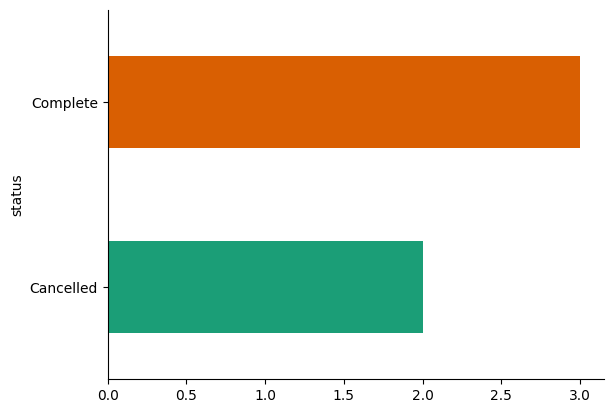

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Com esse setup, agora é a hora de você mostrar suas habilidades ninjas!